<h2>Library</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

<h2>Functions</h2>

In [2]:
def y_fmt_k(y, _):
    if y >= 1000:
        value = int(y / 1000)
        return f'{value}k'
    else:
        return str(int(y))

def plot_country_data(df, title):
    fig = plt.figure(figsize=(10, 2.8))
    fig.suptitle(title, fontsize=16)

    # 1 row, 4 columns
    ax0 = fig.add_subplot(1, 4, 1)  
    ax1 = fig.add_subplot(1, 4, 2)
    ax2 = fig.add_subplot(1, 4, 3)
    ax3 = fig.add_subplot(1, 4, 4)

    df_reach = df.groupby(['Date', 'Provider'])['Reach'].sum().reset_index()
    df_impressions = df.groupby(['Date', 'Provider'])['Impressions'].sum().reset_index()
    df_frequency = df.groupby(['Date', 'Provider'])['Frequency'].sum().reset_index()
    df_clicks = df.groupby(['Date', 'Provider'])['Clicks'].sum().reset_index()

    df_reach.pivot(index='Date', columns='Provider', values='Reach').plot(ax=ax0)
    df_impressions.pivot(index='Date', columns='Provider', values='Impressions').plot(ax=ax1)
    df_frequency.pivot(index='Date', columns='Provider', values='Frequency').plot(ax=ax2)
    df_clicks.pivot(index='Date', columns='Provider', values='Clicks').plot(ax=ax3)

    for ax in [ax0, ax1, ax2, ax3]:
        ax.set_xlabel('Date', fontsize=8)
        ax.set_ylabel('value', fontsize=8)
        ax.legend(fontsize=6)
        ax.tick_params(axis='both', labelsize=8)
        ax.tick_params(axis='x', rotation=45)
        ax.xaxis.set_major_formatter(mdates.DateFormatter(fmt='%b-%d'))
        ax.xaxis.set_minor_formatter(mdates.DateFormatter(fmt=''))
        ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
        ax.yaxis.set_major_formatter(FuncFormatter(y_fmt_k))

    ax0.set_title('Reach', fontsize=10)
    ax1.set_title('Impressions', fontsize=10)
    ax2.set_title('Frequency', fontsize=10)
    ax3.set_title('Clicks', fontsize=10)

    plt.tight_layout()
    plt.show()

<h2>Dataset</h2>

In [3]:
df = pd.read_csv(r'csv\df.csv', parse_dates=['Date'])

In [4]:
df['Country'].unique()

array(['FR', 'CA', 'BR'], dtype=object)

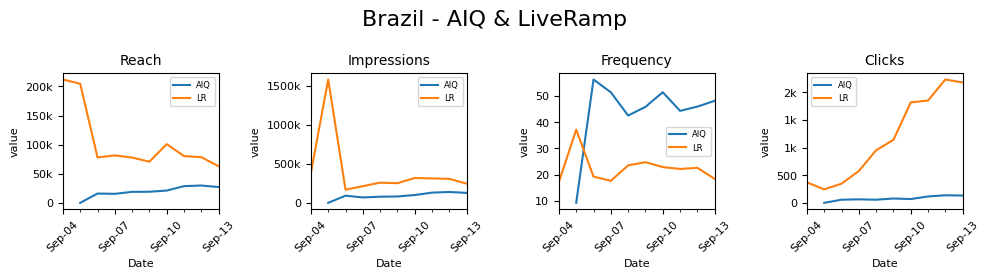

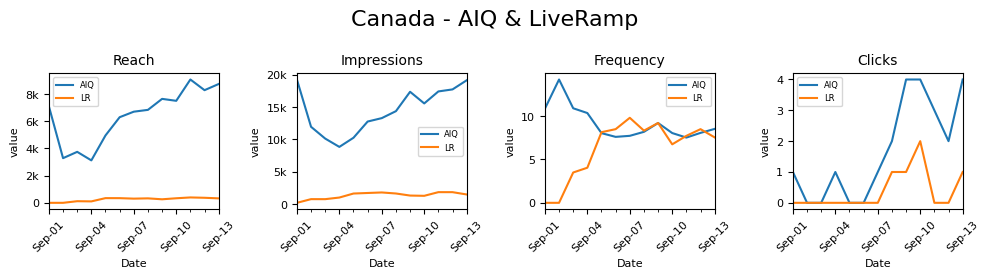

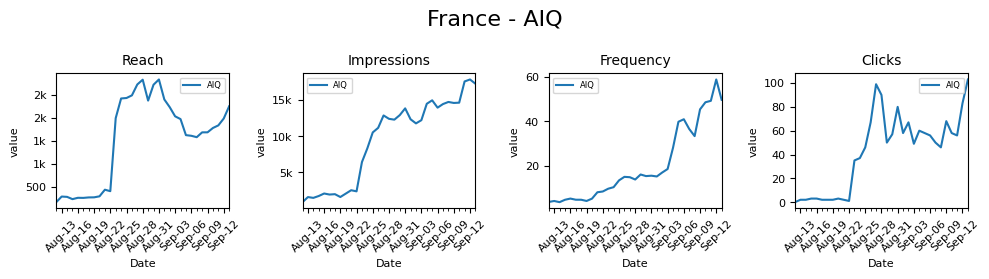

In [5]:
# Filter data for AU, BR, CA & FR
df_au = df[df['Country'].str.contains('AU')]
df_br = df[df['Country'].str.contains('BR')]
df_ca = df[df['Country'].str.contains('CA')]
df_fr = df[df['Country'].str.contains('FR')]

# Plot data
#plot_country_data(df_au, 'Australia - AIQ & LiveRamp')
plot_country_data(df_br, 'Brazil - AIQ & LiveRamp')
plot_country_data(df_ca, 'Canada - AIQ & LiveRamp')
plot_country_data(df_fr, 'France - AIQ')